In [1]:
import numpy as np
from matplotlib import pyplot as plt
path = "/Users/peter/Work/semiempirical_transparency/"

In [2]:
phi_10 = np.load(path + "data/phi_10MeV.npy")
phi_6 = np.load(path + "data/phi_6MeV.npy")
phi_4 = np.load(path + "data/phi_4MeV.npy")
E_10 = np.load(path + "data/E.npy")

Text(0.5, 1.0, '4 MeV bremsstrahlung flux spectrum')

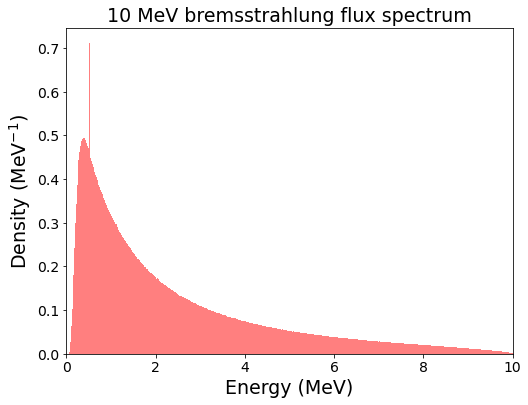

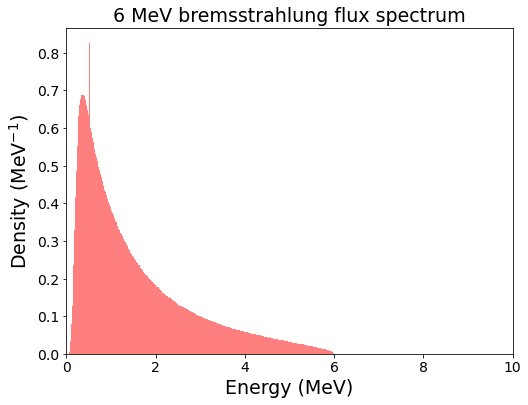

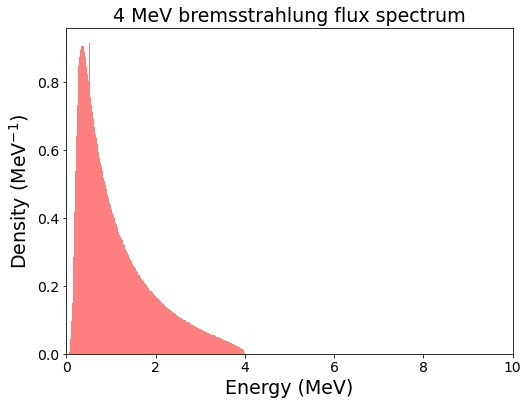

In [3]:
### Plot as a function of energy

plt.figure(figsize = [8, 6])
plt.bar(E_10, phi_10, width=0.01, color = 'r', alpha=0.5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim([0, 10])
plt.xlabel("Energy (MeV)", fontsize=19)
plt.ylabel("Density (MeV$^{-1}$)", fontsize=19)
plt.title("10 MeV bremsstrahlung flux spectrum", fontsize=19)

plt.figure(figsize = [8, 6])
plt.bar(E_10, phi_6, width=0.01, color = 'r', alpha=0.5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim([0, 10])
plt.xlabel("Energy (MeV)", fontsize=19)
plt.ylabel("Density (MeV$^{-1}$)", fontsize=19)
plt.title("6 MeV bremsstrahlung flux spectrum", fontsize=19)

plt.figure(figsize = [8, 6])
plt.bar(E_10, phi_4, width=0.01, color = 'r', alpha=0.5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim([0, 10])
plt.xlabel("Energy (MeV)", fontsize=19)
plt.ylabel("Density (MeV$^{-1}$)", fontsize=19)
plt.title("4 MeV bremsstrahlung flux spectrum", fontsize=19)

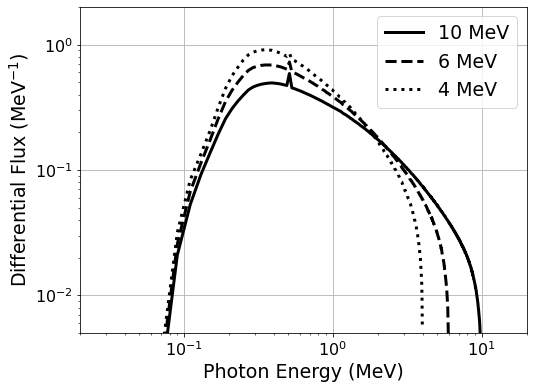

In [6]:
phi_10_plot = phi_10
phi_6_plot = phi_6[:600]
phi_4_plot = phi_4[:400]

E_10_plot = E_10
E_6_plot = E_10_plot[:600]
E_4_plot = E_10_plot[:400]

n = 2
phi_10_plot = np.mean(phi_10_plot.reshape(-1, n), axis=1)
phi_6_plot = np.mean(phi_6_plot.reshape(-1, n), axis=1)
phi_4_plot = np.mean(phi_4_plot.reshape(-1, n), axis=1)

E_10_plot = np.mean(E_10_plot.reshape(-1, n), axis=1)
E_6_plot = np.mean(E_6_plot.reshape(-1, n), axis=1)
E_4_plot = np.mean(E_4_plot.reshape(-1, n), axis=1)

plt.figure(figsize=[8, 6])
plt.plot(E_10_plot, phi_10_plot, color = 'k', linewidth = 3, label = "10 MeV")
plt.plot(E_6_plot, phi_6_plot, color = 'k', linewidth = 3, linestyle = "dashed", label = "6 MeV")
plt.plot(E_4_plot, phi_4_plot, color = 'k', linewidth = 3, linestyle = "dotted", label = "4 MeV")
plt.semilogy()
plt.semilogx()
plt.grid()
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylim([5e-3, 2])
plt.xlim([2e-2, 20])
plt.ylabel(r"Differential Flux (MeV${}^{-1}$)", fontsize = 19)
plt.xlabel("Photon Energy (MeV)", fontsize = 19)
plt.legend(fontsize=19)

In [9]:
### Generate input_spectrum.txt for each phi bin

E_bins = 1000
E_max = 10
E_range = np.linspace(0, E_max, E_bins+1)

### 4 MeV
energy = 4
idx = np.argmin(E_range <= (energy + 1e-10))
assert np.all(phi_4[idx-1] == 0)

data = np.array([E_range[:idx], phi_4[:idx]]).T
np.savetxt(path + "data/input_spectrum_E=%sMeV.txt" % energy, data, fmt='%.14f')

### 6 MeV
energy = 6
idx = np.argmin(E_range <= (energy + 1e-10))
assert np.all(phi_6[idx-1] == 0)

data = np.array([E_range[:idx], phi_6[:idx]]).T
np.savetxt(path + "data/input_spectrum_E=%sMeV.txt" % energy, data, fmt='%.14f')

### 10 MeV
energy = 10
data = np.array([E_range, np.concatenate((phi_10, [0]))]).T
np.savetxt(path + "data/input_spectrum_E=%sMeV.txt" % energy, data, fmt='%.14f')